In [1]:
import os
import dbf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import alphashape
import cartopy.crs as ccrs
import pygeos
from scipy.spatial import Delaunay
%matplotlib inline

import os

In [2]:
os.chdir('../data/arauco/data/forest_inventories')
# Import inventory data
inventory=pd.read_csv('parc_inventarios_full.csv')
# assign study area value
bbox = box(-73.7, -37.9,-72.8,-37)
# convert to gdf
gdf = gpd.GeoDataFrame(inventory, geometry=gpd.points_from_xy(inventory['coords.x1'], inventory['coords.x2']))
gdf = gdf.set_crs('epsg:4326')

# clip to study area
study_inventory = gpd.clip(gdf, mask=bbox)

In [3]:
# import chile data
chile_map = gpd.read_file('/Users/brianlee/Desktop/ch3/chile_forests/data/gis/chile/CHL_adm0.shp')
chile_map.to_crs(epsg=4326)

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,48,CHL,Chile,CHILE,Chile,Chile,None,None,None,Chili,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-67.31805 -55.96819, -67.31805..."


(-38.0, -36.8)

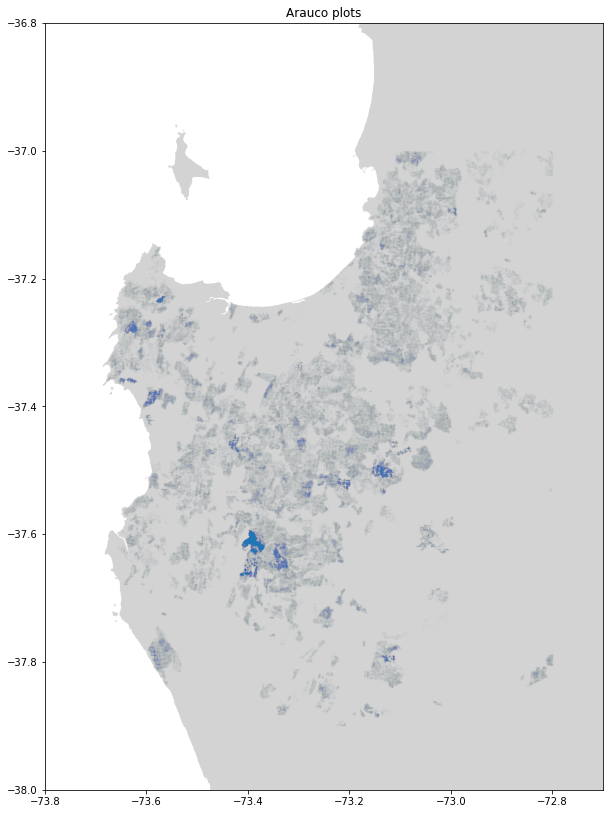

In [4]:
# Visualize points
fig, ax = plt.subplots(figsize = (10,30))
chile_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
study_inventory.plot(ax=ax, alpha = .01, markersize=0.5)
ax.set_title('Arauco plots')
# plt.savefig('Property Map')

xlim = (-73.8, -72.7)
ylim = (-38, -36.8)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [5]:
# calculate age in 2019 and inventory year
study_inventory['age_2019'] = 2019 - study_inventory['ANO_PLANTA']
study_inventory['inv_year'] = pd.DatetimeIndex(study_inventory['FCH_INVENT']).year
study_inventory['parcel_id_year'] = study_inventory['ID2'] + '-' + study_inventory['inv_year'].astype(str)

/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A va

In [9]:
study_inventory.loc[study_inventory['inv_year'] == 2019]

,Unnamed: 0,ID2,X,coords.x1,coords.x2,ID,VOLUM,VOL_IU30,VOL_IU10,ABASAL,...,NUM_PARCEL,ALTURA_100,DCM,DAP_100,DAP_MEDIO,ESPECIE,geometry,age_2019,inv_year,parcel_id_year
415150,415151,20110-546202,168488,-73.561361,-37.808532,20110-546202-179,205.8,1.3,188.8,36.0,...,193,20.9,18.3,28.6,17.6,PINUS,POINT (-73.56136 -37.80853),14,2019,20110-546202-2019
415227,415228,20110-546202,168311,-73.561386,-37.807258,20110-546202-2,287.1,2.5,276.1,41.8,...,193,20.9,18.3,28.6,17.6,PINUS,POINT (-73.56139 -37.80726),14,2019,20110-546202-2019
415240,415241,20110-546202,168436,-73.559780,-37.807238,20110-546202-127,160.8,0.0,145.9,25.8,...,193,20.9,18.3,28.6,17.6,PINUS,POINT (-73.55978 -37.80724),14,2019,20110-546202-2019
415156,415157,20110-546202,168348,-73.561411,-37.805984,20110-546202-39,197.8,0.0,173.4,34.1,...,193,20.9,18.3,28.6,17.6,PINUS,POINT (-73.56141 -37.80598),14,2019,20110-546202-2019
416956,416957,20114-544054,171678,-73.397114,-37.726895,20114-544054-21,421.6,27.3,413.5,45.5,...,27,25.7,23.8,32.2,23.1,PINUS,POINT (-73.39711 -37.72690),13,2019,20114-544054-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541693,541694,21364-551214,355179,-73.104275,-37.012976,21364-551214-65,94.4,0.0,84.9,23.8,...,77,14.3,16.9,24.2,16.2,PINUS,POINT (-73.10428 -37.01298),8,2019,21364-551214-2019
541676,541677,21364-551214,355167,-73.105788,-37.011245,21364-551214-53,98.6,0.0,90.7,23.2,...,77,14.3,16.9,24.2,16.2,PINUS,POINT (-73.10579 -37.01125),8,2019,21364-551214-2019
541696,541697,21364-551214,355118,-73.107484,-37.011752,21364-551214-4,53.1,0.0,46.9,12.9,...,77,14.3,16.9,24.2,16.2,PINUS,POINT (-73.10748 -37.01175),8,2019,21364-551214-2019
541643,541644,21364-551214,355146,-73.104338,-37.010427,21364-551214-32,146.5,0.5,137.7,33.1,...,77,14.3,16.9,24.2,16.2,PINUS,POINT (-73.10434 -37.01043),8,2019,21364-551214-2019


In [11]:
# filter out smaller inventory plots that don't make a polygon
size_study_inventory = study_inventory.groupby('parcel_id_year').filter(lambda x: len(x) > 4)


In [12]:
# generalize various parcel metrics
size_study_inventory = study_inventory.assign(volume_mean = size_study_inventory.groupby('parcel_id_year')['VOLUM'].transform('mean'),
                       iu30_mean = size_study_inventory.groupby('parcel_id_year')['VOL_IU10'].transform('mean'),
                       basal_mean = size_study_inventory.groupby('parcel_id_year')['ABASAL'].transform('mean'),
                       height_mean = size_study_inventory.groupby('parcel_id_year')['ALTMED'].transform('mean'),
                       dq_mean = size_study_inventory.groupby('parcel_id_year')['DMC'].transform('mean'),
                       basal_tot_mean = size_study_inventory.groupby('parcel_id_year')['ABASAL_TOT'].transform('mean'),
                       dbh_mean = size_study_inventory.groupby('parcel_id_year')['DAP_MEDIO'].transform('mean'))


In [16]:
# subset data to average out the metrics. Shuffle columns and rename.
metric_subset = size_study_inventory[['coords.x1', 'coords.x2','ESPECIE', 'geometry', 'age_2019', 'inv_year', 'parcel_id_year', 'volume_mean', 'iu30_mean', 'basal_mean', 'height_mean', 'dq_mean', 'basal_tot_mean', 'dbh_mean']]
metric_subset.rename(columns={'coords.x1':'lon', 'coords.x2':'lat', 'ESPECIE':'species'},inplace=True)
metric_subset = metric_subset[['parcel_id_year', 'volume_mean', 'iu30_mean', 'basal_mean', 'height_mean', 'dq_mean', 'basal_tot_mean', 'dbh_mean', 'species', 'inv_year', 'age_2019', 'species', 'lon', 'lat', 'geometry']]

/var/folders/dx/35d3rjys675ftkqgrd2j85lc0000gn/T/ipykernel_25097/3055589405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_subset.rename(columns={'coords.x1':'lon', 'coords.x2':'lat', 'ESPECIE':'species'},inplace=True)


<AxesSubplot:>

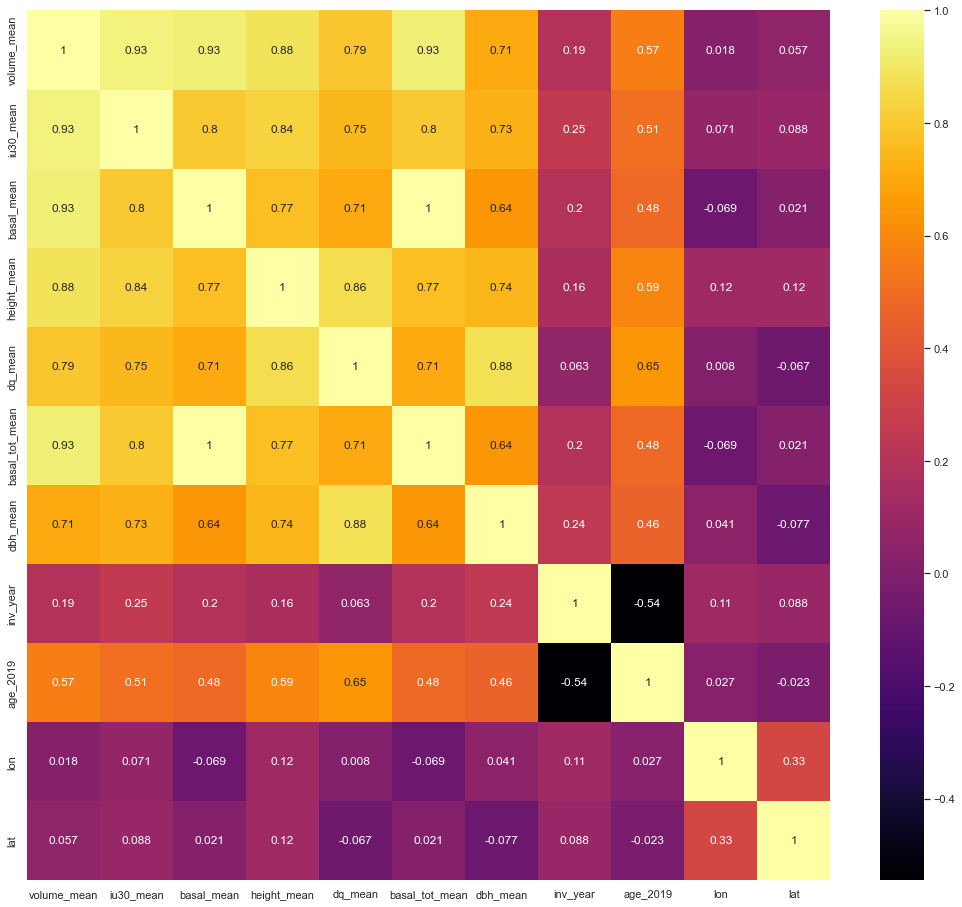

In [28]:
# See how values correlate.
import seaborn as sns
sns.set(rc={'figure.figsize':(18,16)})
sns.heatmap(metric_subset.corr(), annot = True, fmt='.2g',cmap= 'inferno')

array([[<AxesSubplot:title={'center':'age_2019'}>]], dtype=object)

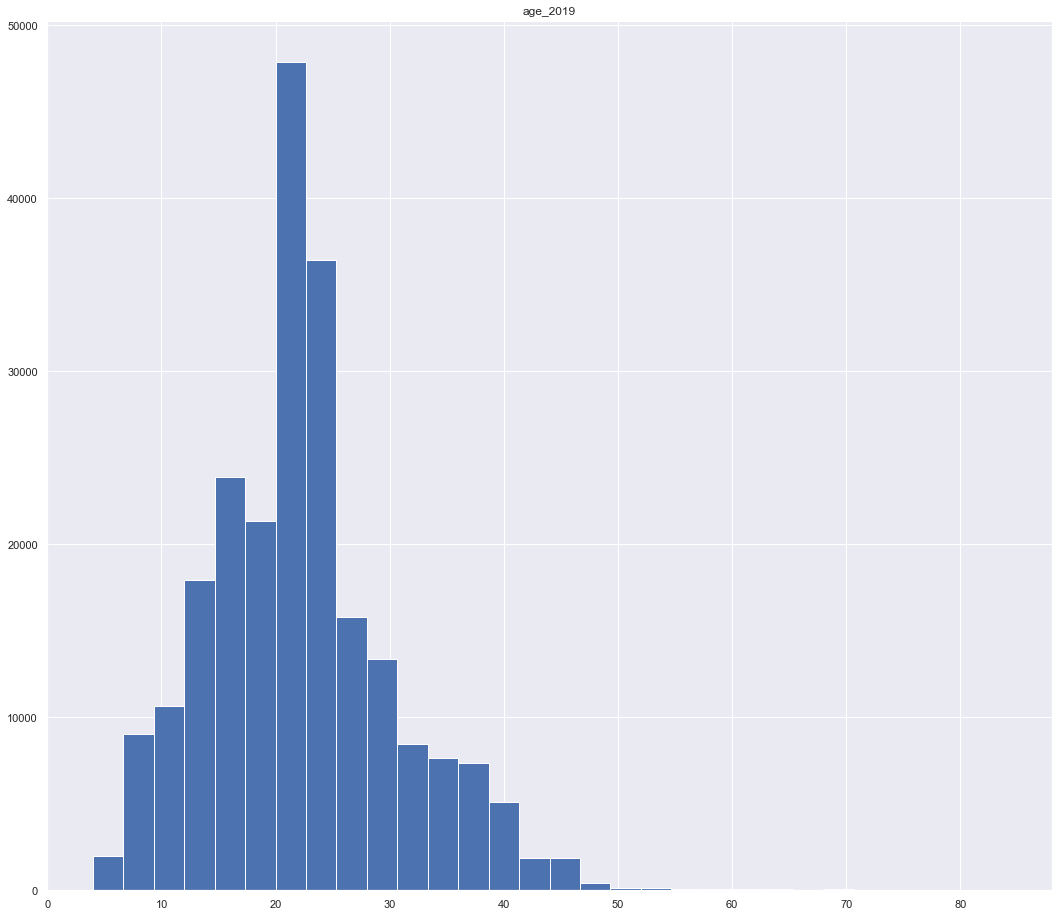

In [35]:
metric_subset.hist(column='age_2019', bins = 30)

In [37]:
os.getcwd()

'/Users/brianlee/Desktop/ch3/chile_forests/data/arauco/data/forest_inventories'

In [39]:
metric_subset.to_csv('metric_subset_2019_age.csv')

In [12]:
# # simple geometry creation--not ideal
# # create dataframe that combines inventory plots to polygons
# polygon_study_inventory = gpd.GeoDataFrame(geometry=size_study_inventory.groupby('parcel_id_year').apply(
#     lambda g: Polygon(gpd.points_from_xy(g['coords.x1'], g['coords.x2']))))

# # dissolve the state boundary by region 
# new_poly = polygon_study_inventory.dissolve(by='parcel_id_year')

# concave = new_poly.convex_hull

# # create the plot
# fig, ax = plt.subplots(figsize = (40,40))

# # plot the data 
# concave.reset_index().plot(column = 'parcel_id_year', ax=ax)

# # Set plot axis to equal ratio
# ax.set_axis_off()
# plt.axis('equal');

In [116]:
# group data by plots id
grouped_plots = size_study_inventory.groupby(['parcel_id_year'])
# create list of dataframes per plot
list_of_groupplots = [grouped_plots.get_group(x) for x in grouped_plots.groups]

/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


<AxesSubplot:>

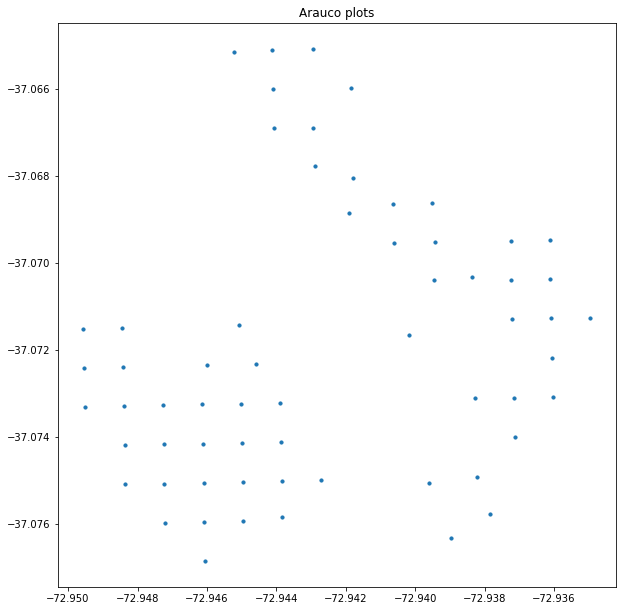

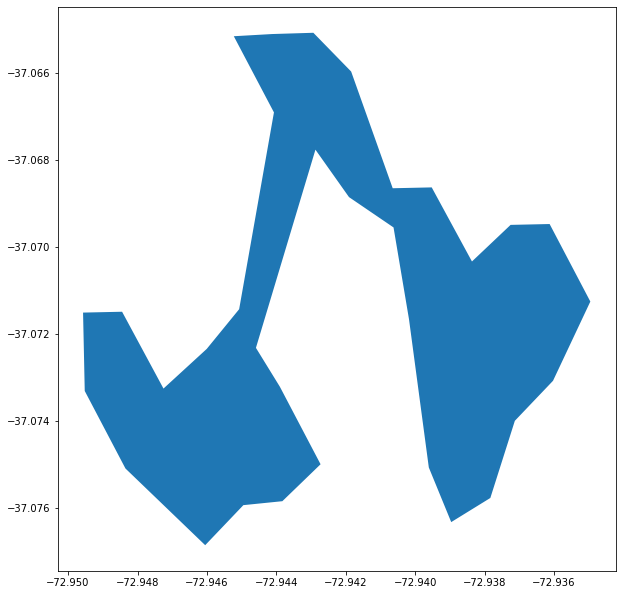

In [104]:
# # Visualize points and alphashapes
# fig, ax = plt.subplots(figsize = (10,30))
# # chile_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
# list_of_groupplots[100].plot(ax=ax, alpha = 1, markersize=10)
# ax.set_title('Arauco plots')

# group = list_of_groupplots[100]
# new_proj_gdf_proj = group.to_crs(ccrs.AlbersEqualArea().proj4_init)
# alpha_shape = alphashape.alphashape(new_proj_gdf_proj)
# new_shape_proj = alpha_shape.to_crs(4326)
# fig, ax = plt.subplots(figsize = (10,30))
# # chile_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
# new_shape_proj.plot(ax=ax, alpha = 1, markersize=10)

In [120]:
# # Get concave hull of plots. Takes a long time.
# group_ids = []
# geometries = []
# for group in list_of_groupplots:
#     if len(group.index) > 3:
#         group_id = list(group['parcel_id_year'])[0]
#         group_ids.append(group_id)
#         new_proj_gdf_proj = group.to_crs(ccrs.AlbersEqualArea().proj4_init)
#         alpha_shape = alphashape.alphashape(new_proj_gdf_proj)
#         new_shape_proj = alpha_shape.to_crs(4326)
#         geometries.append(new_shape_proj)
#     else:
#         pass

/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])
/Users/brianlee/opt/anaconda3/envs/chile_forest/lib/python3.10/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source

In [220]:
# # The output from the concave operation is wonky and has an extra dimension. This guy fixes that and outputs a shp.
# arr = np.array(geometries)
# arrid = np.array(group_ids)
# arrid.shape
# arr = np.squeeze(arr)
# arr_new = np.concatenate((arr, arrid))
# dataset = pd.DataFrame({'plot_id_year': arrid, 'geometry': list(arr)}, columns=['plot_id_year', 'geometry'])
# plots = gpd.GeoDataFrame(
#     dataset, geometry=dataset['geometry'])
# plots = plots.set_crs('epsg:4326')
# plots.to_file('parcel_id_shapes')

/var/folders/dx/35d3rjys675ftkqgrd2j85lc0000gn/T/ipykernel_18839/1674579908.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  plots.to_file('parcel_id_shapes')


In [19]:
# # Later pre-processing. Most of pre-processing was done in Q
# arauco_parcels_2019 = gpd.read_file("gis/arauco_parcels_2019/summary_stats_parcels/2019_StudyParcelsSummaryStats.shp")
# # clean araco_parcels_2019
# my_list = list(arauco_parcels_2019)
# arauco_parcels_2019_sub = arauco_parcels_2019[['id', 'ANO_PLAN_5', 'ANO_PLAN_7', 'geometry']]
# arauco_parcels_2019_sub['age'] = 2022  - arauco_parcels_2019_sub['ANO_PLAN_5'] 
# arauco_parcels_2019_sub = arauco_parcels_2019_sub.drop(columns = ['ANO_PLAN_5','ANO_PLAN_7'])
# arauco_parcels_2019_sub = arauco_parcels_2019_sub.dropna(axis=0)
# arauco_parcels_2019_sub.age.unique()
# arauco_parcels_2019_sub.hist(column = 'age')